In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pandas.util.testing as tm
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import pandas as pd
import io
from google.colab import files
from scipy import stats 
from google.colab import drive
import pandas as pd

# file link is https://drive.google.com/file/d/10FhWhrrB-gqFbNzszgux5DVn07XSQKWl/view?usp=sharing
uploaded = files.upload()
df_origin = pd.read_csv(list(uploaded)[0])

Saving final.csv to final (3).csv


In [31]:
df_origin

,Name,Unpacked_Size(),Total_Files,Last_publish,Weekly_download,Watch,Star,Fork,Versions
0,egg-swagger-validate,NaN,NaN,4 years ago,3,NaN,NaN,NaN,"{'modified': '2018-04-15T06:18:07.841Z', 'crea..."
1,generator-ts-node-module,36.4 kB,32,a year ago,9,1,1,0,"{'created': '2018-11-09T12:45:58.019Z', '1.0.0..."
2,dubdub,NaN,NaN,3 years ago,1,0,0,0,"{'modified': '2017-08-22T17:53:13.800Z', 'crea..."
3,simple-mde,NaN,NaN,4 years ago,4,1,0,0,"{'modified': '2017-04-27T19:22:50.052Z', 'crea..."
4,html5boiler,NaN,NaN,6 years ago,3,2,0,0,"{'modified': '2014-12-10T20:45:20.140Z', 'crea..."
...,...,...,...,...,...,...,...,...,...
20467,memory-record,NaN,NaN,4 years ago,42,1,0,0,"{'modified': '2019-01-04T19:03:49.998Z', 'crea..."
20468,formula-countif,NaN,NaN,5 years ago,2,1,0,0,"{'modified': '2015-09-30T03:38:04.221Z', 'crea..."
20469,is-not-letter,1.82 kB,4,a year ago,1,1,5,1,"{'created': '2019-10-27T14:54:15.754Z', '0.0.1..."
20470,p2pnap,54.8 kB,11,2 years ago,2,0,7,0,"{'created': '2019-04-03T18:47:05.264Z', '1.0.0..."


In [32]:
df = df_origin[['Name','Unpacked_Size()','Total_Files','Last_publish','Weekly_download','Watch','Star','Fork','Versions']]
df = df[df['Versions'].notna()]
df = df.drop_duplicates(subset='Name', keep="first")
import math

df['Unpacked_Size()'] = df['Unpacked_Size()'].astype(str) 
df['Unpacked_Size()'] = df['Unpacked_Size()'].astype(str) 


drop_list = [12232,13896]
for i in drop_list:
  df=df.drop(i)
df['Weekly_download'] = pd.to_numeric(df['Weekly_download']) 
df.reset_index()


print(df.dtypes)
for index in range(0, df.shape[0]):
  row = df.iloc[index]
  wat = row['Watch']
  star = row['Star']
  fork = row['Fork']
  Unpacked_Size_KB = row['Unpacked_Size()']
  last_publish = row['Last_publish']

  if type(wat) is str:
    if 'k' in wat:
      wat = float(wat.split('k')[0])*1000
    else:
      wat = int(wat)
    df.loc[df.index[index], 'Watch'] = wat
  if type(star) is str:
    if 'k' in star:
      star = float(star.split('k')[0])*1000
    else:
      star = int(star)
    df.loc[df.index[index], 'Star'] = star
  if type(fork) is str:
    if 'k' in fork:
      fork = float(fork.split('k')[0])*1000
    else:
      fork = int(fork)
    df.loc[df.index[index], 'Fork'] = fork
  
  # Last Publish
  if 'years ago' in str(last_publish):
    df.loc[df.index[index], 'Last_publish(Month)'] = 12*int(last_publish.replace('years ago',''))

  if 'a year ago' in str(last_publish):
    df.loc[df.index[index], 'Last_publish(Month)'] = 12

  if 'days ago' in str(last_publish):
    df.loc[df.index[index], 'Last_publish(Month)'] = int(last_publish.replace('days ago',''))/30

  if 'a day ago' in str(last_publish):
    df.loc[df.index[index], 'Last_publish(Month)'] = 1/30

  if 'months ago' in str(last_publish):
    df.loc[df.index[index], 'Last_publish(Month)'] = int(last_publish.replace('months ago',''))

  if 'a month ago' in str(last_publish):
    df.loc[df.index[index], 'Last_publish(Month)'] = 1

  if 'hour' in str(last_publish):
    df.loc[df.index[index], 'Last_publish(Month)'] = 0

  if 'minute' in str(last_publish):
    df.loc[df.index[index], 'Last_publish(Month)'] = 0


  if 'kB' in Unpacked_Size_KB:
    Unpacked_Size_KB = Unpacked_Size_KB.replace('kB', ' ')
    Unpacked_Size_KB = float(Unpacked_Size_KB)
  elif 'MB' in Unpacked_Size_KB:
    Unpacked_Size_KB = Unpacked_Size_KB.replace('MB', ' ')
    Unpacked_Size_KB = float(Unpacked_Size_KB)*1000
  elif 'B' in Unpacked_Size_KB:
    Unpacked_Size_KB = Unpacked_Size_KB.replace('B', ' ')
    Unpacked_Size_KB = float(Unpacked_Size_KB)/1000
  else:
    Unpacked_Size_KB = str(Unpacked_Size_KB)
  df.loc[df.index[index], 'Unpacked_Size()'] = Unpacked_Size_KB
          
df.shape

Name                object
Unpacked_Size()     object
Total_Files         object
Last_publish        object
Weekly_download    float64
Watch               object
Star                object
Fork                object
Versions            object
dtype: object


(18977, 10)

In [33]:
df.head(50)

,Name,Unpacked_Size(),Total_Files,Last_publish,Weekly_download,Watch,Star,Fork,Versions,Last_publish(Month)
0,egg-swagger-validate,nan,NaN,4 years ago,3.0,NaN,NaN,NaN,"{'modified': '2018-04-15T06:18:07.841Z', 'crea...",48.0
1,generator-ts-node-module,36.4,32,a year ago,9.0,1,1,0,"{'created': '2018-11-09T12:45:58.019Z', '1.0.0...",12.0
2,dubdub,nan,NaN,3 years ago,1.0,0,0,0,"{'modified': '2017-08-22T17:53:13.800Z', 'crea...",36.0
3,simple-mde,nan,NaN,4 years ago,4.0,1,0,0,"{'modified': '2017-04-27T19:22:50.052Z', 'crea...",48.0
4,html5boiler,nan,NaN,6 years ago,3.0,2,0,0,"{'modified': '2014-12-10T20:45:20.140Z', 'crea...",72.0
5,axios-cache,825,14,3 years ago,98.0,2,17,2,"{'modified': '2018-03-13T09:04:11.941Z', 'crea...",36.0
6,handle-that,10.8,4,2 years ago,27.0,1,0,0,"{'modified': '2018-06-07T09:51:09.154Z', 'crea...",24.0
7,@types/git-add-remote,3.1,4,2 years ago,22.0,660,31000,23300,"{'created': '2018-12-25T21:11:21.909Z', '1.0.0...",24.0
8,angular-drywall,nan,NaN,5 years ago,17.0,19,111,611,"{'modified': '2016-12-08T08:03:51.774Z', 'crea...",60.0
9,@td-design/webpack-theme-replacer,146,32,a year ago,1.0,1,0,0,"{'created': '2019-10-24T02:09:48.986Z', '1.0.0...",12.0


In [34]:
# Last publish month
df['Last_publish(Month)'] = df['Last_publish(Month)'].astype(str) 

df[df['Last_publish(Month)'] == '#VALUE!']

for index in range(0, df.shape[0]):
    row = df.iloc[index]
    Last_publish_Month = row['Last_publish(Month)']
    Last_publish = row['Last_publish']
    if type(Last_publish_Month) is str:
      if 'nan' in Last_publish_Month or 'NaN' in Last_publish_Month:
        Last_publish_Month =  float(Last_publish) * 12
        Last_publish_Month = float(Last_publish_Month)
      else:
        Last_publish_Month = str(Last_publish_Month)
      df.loc[df.index[index], 'Last_publish(Month)'] = Last_publish_Month

In [37]:
df['Unpacked_Size()'] = df['Unpacked_Size()'].astype(float) 
df['Total_Files'] = df['Total_Files'].astype(float) 
df['Last_publish(Month)'] = df['Last_publish(Month)'].astype(float) 
df['Watch'] = df['Watch'].astype(float) 
df['Star'] = df['Star'].astype(float) 
df['Fork'] = df['Fork'].astype(float) 

In [38]:
df.head(20)

,Name,Unpacked_Size(),Total_Files,Last_publish,Weekly_download,Watch,Star,Fork,Versions,Last_publish(Month)
0,egg-swagger-validate,NaN,NaN,4 years ago,3.0,NaN,NaN,NaN,"{'modified': '2018-04-15T06:18:07.841Z', 'crea...",48.0
1,generator-ts-node-module,36.40,32.0,a year ago,9.0,1.0,1.0,0.0,"{'created': '2018-11-09T12:45:58.019Z', '1.0.0...",12.0
2,dubdub,NaN,NaN,3 years ago,1.0,0.0,0.0,0.0,"{'modified': '2017-08-22T17:53:13.800Z', 'crea...",36.0
3,simple-mde,NaN,NaN,4 years ago,4.0,1.0,0.0,0.0,"{'modified': '2017-04-27T19:22:50.052Z', 'crea...",48.0
4,html5boiler,NaN,NaN,6 years ago,3.0,2.0,0.0,0.0,"{'modified': '2014-12-10T20:45:20.140Z', 'crea...",72.0
5,axios-cache,825.00,14.0,3 years ago,98.0,2.0,17.0,2.0,"{'modified': '2018-03-13T09:04:11.941Z', 'crea...",36.0
6,handle-that,10.80,4.0,2 years ago,27.0,1.0,0.0,0.0,"{'modified': '2018-06-07T09:51:09.154Z', 'crea...",24.0
7,@types/git-add-remote,3.10,4.0,2 years ago,22.0,660.0,31000.0,23300.0,"{'created': '2018-12-25T21:11:21.909Z', '1.0.0...",24.0
8,angular-drywall,NaN,NaN,5 years ago,17.0,19.0,111.0,611.0,"{'modified': '2016-12-08T08:03:51.774Z', 'crea...",60.0
9,@td-design/webpack-theme-replacer,146.00,32.0,a year ago,1.0,1.0,0.0,0.0,"{'created': '2019-10-24T02:09:48.986Z', '1.0.0...",12.0


In [25]:
df

,Name,Unpacked_Size(),Total_Files,Last_publish,Weekly_download,Watch,Star,Fork,Versions,Last_publish(Month)
0,egg-swagger-validate,NaN,NaN,4 years ago,3.0,NaN,NaN,NaN,"{'modified': '2018-04-15T06:18:07.841Z', 'crea...",48.000000
1,generator-ts-node-module,36.40,32.0,a year ago,9.0,1.0,1.0,0.0,"{'created': '2018-11-09T12:45:58.019Z', '1.0.0...",12.000000
2,dubdub,NaN,NaN,3 years ago,1.0,0.0,0.0,0.0,"{'modified': '2017-08-22T17:53:13.800Z', 'crea...",36.000000
3,simple-mde,NaN,NaN,4 years ago,4.0,1.0,0.0,0.0,"{'modified': '2017-04-27T19:22:50.052Z', 'crea...",48.000000
4,html5boiler,NaN,NaN,6 years ago,3.0,2.0,0.0,0.0,"{'modified': '2014-12-10T20:45:20.140Z', 'crea...",72.000000
...,...,...,...,...,...,...,...,...,...,...
20467,memory-record,NaN,NaN,4 years ago,42.0,1.0,0.0,0.0,"{'modified': '2019-01-04T19:03:49.998Z', 'crea...",48.000000
20468,formula-countif,NaN,NaN,5 years ago,2.0,1.0,0.0,0.0,"{'modified': '2015-09-30T03:38:04.221Z', 'crea...",60.000000
20469,is-not-letter,1.82,4.0,a year ago,1.0,1.0,5.0,1.0,"{'created': '2019-10-27T14:54:15.754Z', '0.0.1...",12.000000
20470,p2pnap,54.80,11.0,2 years ago,2.0,0.0,7.0,0.0,"{'created': '2019-04-03T18:47:05.264Z', '1.0.0...",24.000000


In [39]:
df['status'] = ' '
Weekly_download_median = df['Weekly_download'].median()
Last_publish_month_median = df['Last_publish(Month)'].median()
Watch_median = df['Watch'].median()
Size_median = df['Unpacked_Size()'].median()

for index in range(0, df.shape[0]):
    row = df.iloc[index]
    Last_publish_Month = row['Last_publish(Month)']
    Weekly_download = row['Weekly_download']
    Size = row['Unpacked_Size()']
    Watch = row['Watch']
    Star = row['Star']
    Fork = row['Fork']

    if Weekly_download>=Weekly_download_median:
      df.loc[df.index[index], 'status'] = 'Active'
    elif Last_publish_Month<Last_publish_month_median:
      if Weekly_download==0:
        df.loc[df.index[index], 'status'] = 'trivial'
      else:
        df.loc[df.index[index], 'status'] = 'Active'
    else:
      if Weekly_download==0:
        if Last_publish_Month>=2 * Last_publish_month_median:
          df.loc[df.index[index], 'status'] = 'dead'
        else:
          df.loc[df.index[index], 'status'] = 'inactive'
      else:
        if Last_publish_Month>=2 * Last_publish_month_median:
          df.loc[df.index[index], 'status'] = 'discontinued'
        else:
          if Size<Size_median/2:
            df.loc[df.index[index], 'status'] = 'trivial'
          elif Fork==0 and Star==0 and Watch==0:
            df.loc[df.index[index], 'status'] = 'dead'
          else:
            df.loc[df.index[index], 'status'] = 'inactive'

df.dropna(subset = ["status"], inplace=True) 
df.head(10)

,Name,Unpacked_Size(),Total_Files,Last_publish,Weekly_download,Watch,Star,Fork,Versions,Last_publish(Month),status
0,egg-swagger-validate,NaN,NaN,4 years ago,3.0,NaN,NaN,NaN,"{'modified': '2018-04-15T06:18:07.841Z', 'crea...",48.0,inactive
1,generator-ts-node-module,36.4,32.0,a year ago,9.0,1.0,1.0,0.0,"{'created': '2018-11-09T12:45:58.019Z', '1.0.0...",12.0,Active
2,dubdub,NaN,NaN,3 years ago,1.0,0.0,0.0,0.0,"{'modified': '2017-08-22T17:53:13.800Z', 'crea...",36.0,dead
3,simple-mde,NaN,NaN,4 years ago,4.0,1.0,0.0,0.0,"{'modified': '2017-04-27T19:22:50.052Z', 'crea...",48.0,inactive
4,html5boiler,NaN,NaN,6 years ago,3.0,2.0,0.0,0.0,"{'modified': '2014-12-10T20:45:20.140Z', 'crea...",72.0,discontinued
5,axios-cache,825.0,14.0,3 years ago,98.0,2.0,17.0,2.0,"{'modified': '2018-03-13T09:04:11.941Z', 'crea...",36.0,Active
6,handle-that,10.8,4.0,2 years ago,27.0,1.0,0.0,0.0,"{'modified': '2018-06-07T09:51:09.154Z', 'crea...",24.0,Active
7,@types/git-add-remote,3.1,4.0,2 years ago,22.0,660.0,31000.0,23300.0,"{'created': '2018-12-25T21:11:21.909Z', '1.0.0...",24.0,Active
8,angular-drywall,NaN,NaN,5 years ago,17.0,19.0,111.0,611.0,"{'modified': '2016-12-08T08:03:51.774Z', 'crea...",60.0,Active
9,@td-design/webpack-theme-replacer,146.0,32.0,a year ago,1.0,1.0,0.0,0.0,"{'created': '2019-10-24T02:09:48.986Z', '1.0.0...",12.0,Active


In [40]:
Status_count = df.status.value_counts()
Status_count

Active          13073
inactive         3926
trivial           960
discontinued      863
dead              155
Name: status, dtype: int64

In [41]:
df.fillna(df.median(), inplace=True)
df.head(10)

,Name,Unpacked_Size(),Total_Files,Last_publish,Weekly_download,Watch,Star,Fork,Versions,Last_publish(Month),status
0,egg-swagger-validate,27.9,10.0,4 years ago,3.0,1.0,1.0,1.0,"{'modified': '2018-04-15T06:18:07.841Z', 'crea...",48.0,inactive
1,generator-ts-node-module,36.4,32.0,a year ago,9.0,1.0,1.0,0.0,"{'created': '2018-11-09T12:45:58.019Z', '1.0.0...",12.0,Active
2,dubdub,27.9,10.0,3 years ago,1.0,0.0,0.0,0.0,"{'modified': '2017-08-22T17:53:13.800Z', 'crea...",36.0,dead
3,simple-mde,27.9,10.0,4 years ago,4.0,1.0,0.0,0.0,"{'modified': '2017-04-27T19:22:50.052Z', 'crea...",48.0,inactive
4,html5boiler,27.9,10.0,6 years ago,3.0,2.0,0.0,0.0,"{'modified': '2014-12-10T20:45:20.140Z', 'crea...",72.0,discontinued
5,axios-cache,825.0,14.0,3 years ago,98.0,2.0,17.0,2.0,"{'modified': '2018-03-13T09:04:11.941Z', 'crea...",36.0,Active
6,handle-that,10.8,4.0,2 years ago,27.0,1.0,0.0,0.0,"{'modified': '2018-06-07T09:51:09.154Z', 'crea...",24.0,Active
7,@types/git-add-remote,3.1,4.0,2 years ago,22.0,660.0,31000.0,23300.0,"{'created': '2018-12-25T21:11:21.909Z', '1.0.0...",24.0,Active
8,angular-drywall,27.9,10.0,5 years ago,17.0,19.0,111.0,611.0,"{'modified': '2016-12-08T08:03:51.774Z', 'crea...",60.0,Active
9,@td-design/webpack-theme-replacer,146.0,32.0,a year ago,1.0,1.0,0.0,0.0,"{'created': '2019-10-24T02:09:48.986Z', '1.0.0...",12.0,Active


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df[['Weekly_download', 'Last_publish(Month)', 'Watch', 'Fork', 'Star','Unpacked_Size()']]
Y = df[['status']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.7)
clf = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.3f}' .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on testing set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.995
Accuracy of Decision Tree classifier on testing set: 0.993


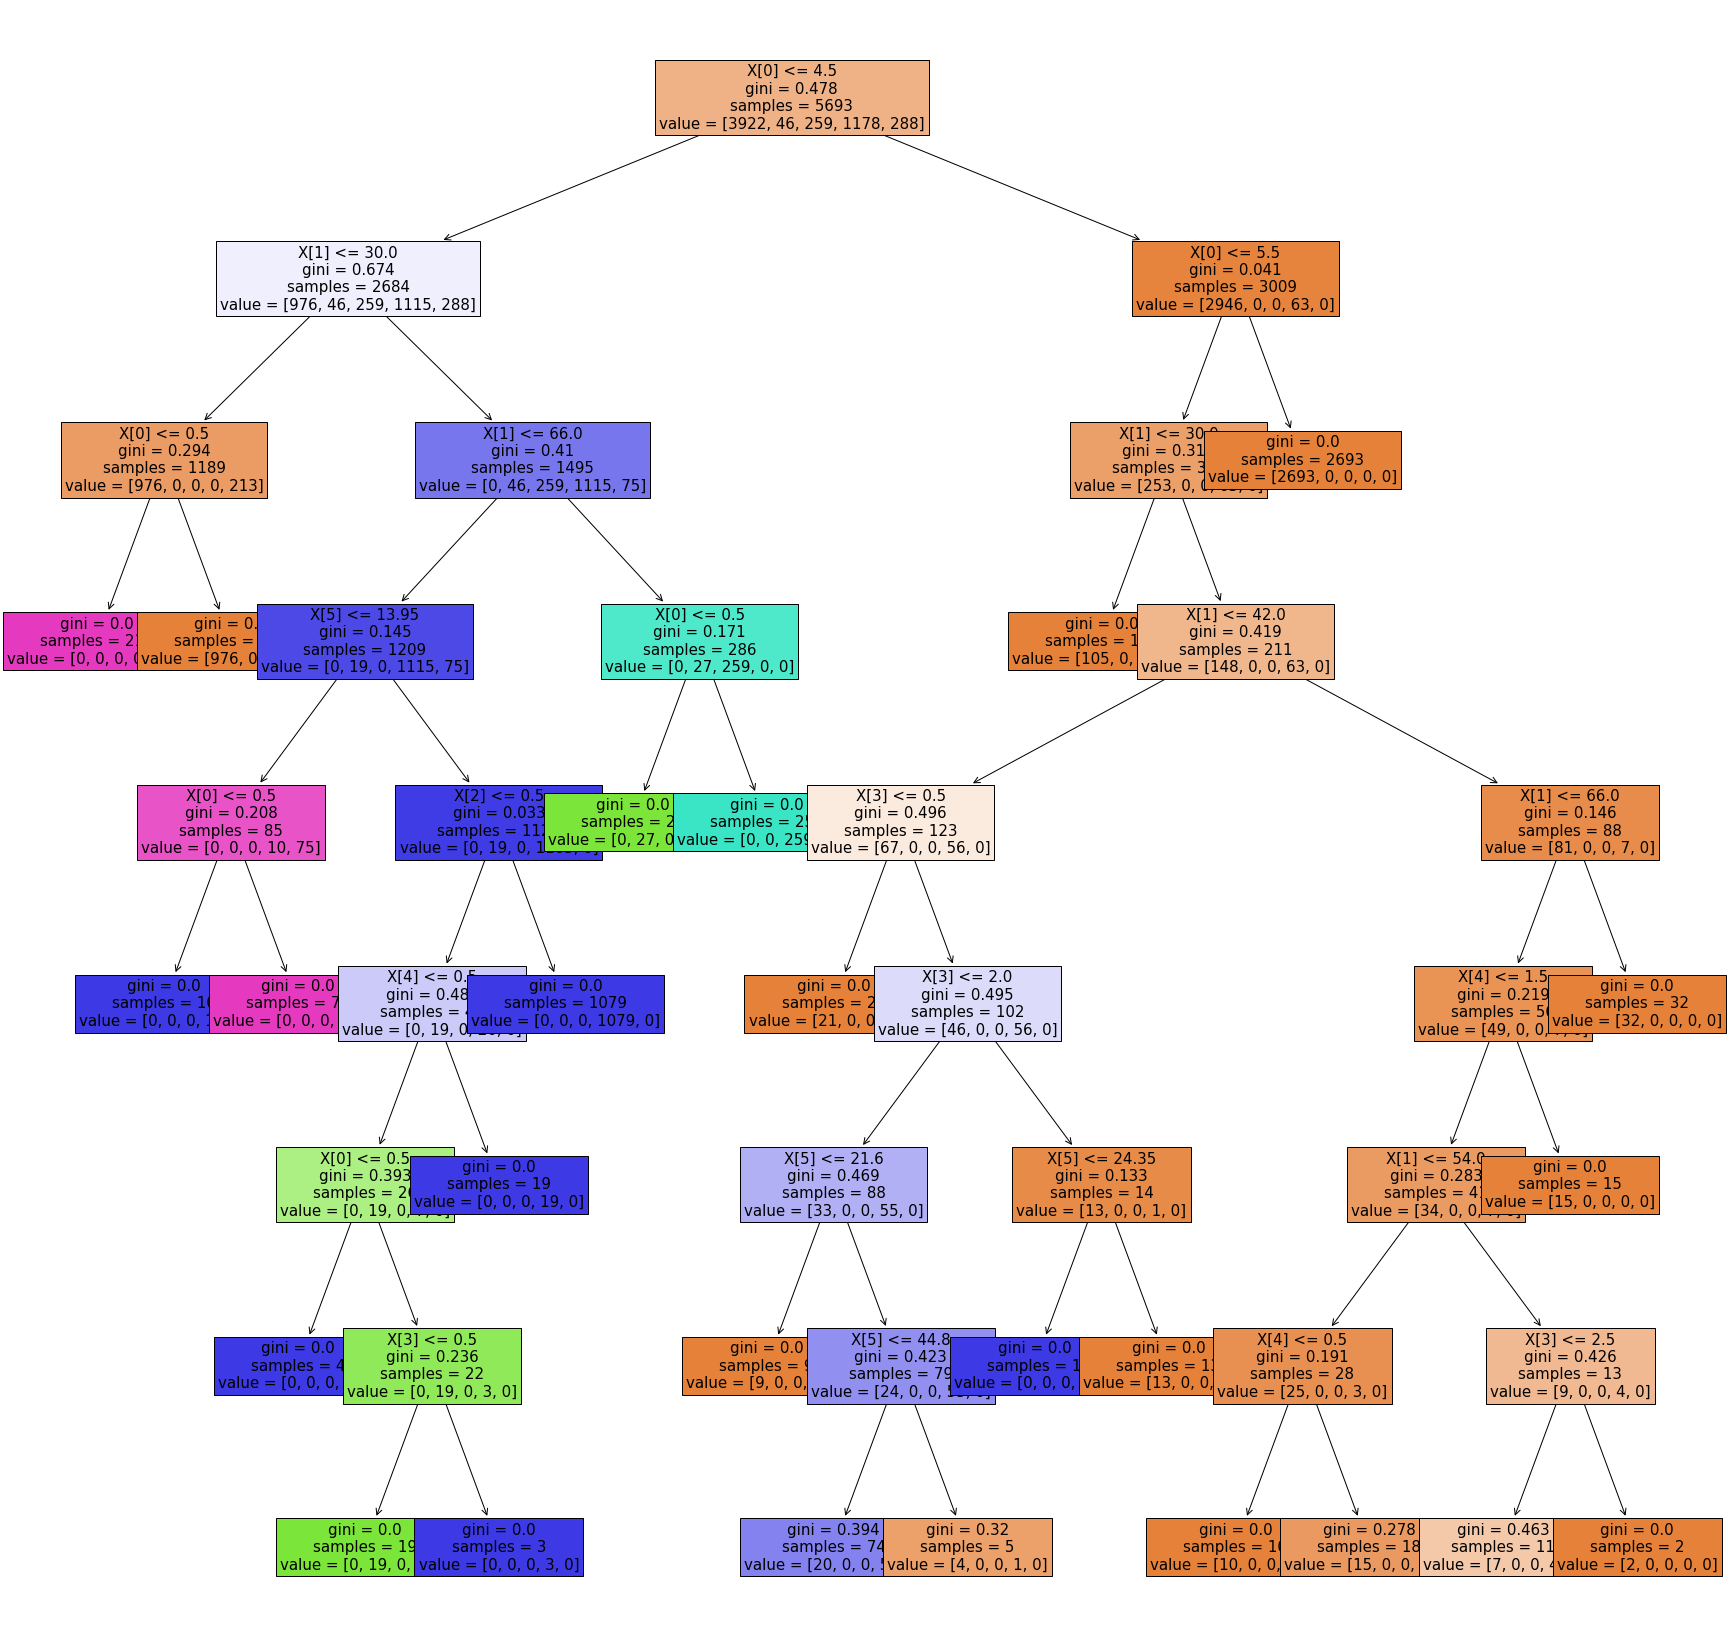

In [30]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.subplots(figsize=(30, 30))
plot_tree(clf,filled=True, fontsize=15)
plt.show()

